 ## Анализ развлекательного приложения Procrastinate Pro+.

### Загрузиv данные и подготовим их к анализу

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

Изучим данные и выполним предобработку. Есть ли в данных пропуски и дубликаты? Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратим внимание на столбцы с датой и временем.

In [ ]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [ ]:
#код загрузки датасета визитов
visits = pd.read_csv('/datasets/visits_info_short.csv')
#Заменим названия столбцов (приведем к нижнему регистру)
visits.columns = map(str.lower, visits.columns)
#Поменяем тип данных для дат
visits['session start'] = pd.to_datetime(visits['session start'])
visits['session end'] = pd.to_datetime(visits['session end'])
visits.info()
display(visits.head(10));
#Проверяем наличие пропусков
pd.DataFrame(round(visits.isna().mean()*100,1)).style.background_gradient('coolwarm')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session start  309901 non-null  datetime64[ns]
 5   session end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


,user id,region,device,channel,session start,session end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


,0
user id,0.000000
region,0.000000
device,0.000000
channel,0.000000
session start,0.000000
session end,0.000000


In [ ]:
#Проверяем наличие дубликатов
print(visits.duplicated().sum())

0


In [ ]:
#код загрузки датасета заказов
purchases = pd.read_csv('/datasets/orders_info_short.csv')
#Заменим названия столбцов (приведем к нижнему регистру)
purchases.columns = map(str.lower, purchases.columns)
#Поменяем тип данных для дат
purchases['event dt'] = pd.to_datetime(purchases['event dt'], format="%Y.%m.%d %H:%M:%S")
purchases.info()
display(purchases.head(10));
#Проверяем наличие пропусков
pd.DataFrame(round(purchases.isna().mean()*100,1)).style.background_gradient('coolwarm')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user id   40212 non-null  int64         
 1   event dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


,user id,event dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


,0
user id,0.000000
event dt,0.000000
revenue,0.000000


In [ ]:
#Проверяем наличие дубликатов
print(purchases.duplicated().sum())

0


In [ ]:
#код загрузки датасета расходов
ad_costs = pd.read_csv('//datasets/costs_info_short.csv')
#Заменим названия столбцов (приведем к нижнему регистру)
ad_costs.columns = map(str.lower, ad_costs.columns)
#Поменяем тип данных для дат
ad_costs['dt'] = pd.to_datetime(ad_costs['dt']).dt.date
ad_costs.info()
display(ad_costs.head(10));
#Проверяем наличие пропусков
pd.DataFrame(round(ad_costs.isna().mean()*100,1)).style.background_gradient('coolwarm')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


,0
dt,0.000000
channel,0.000000
costs,0.000000


In [ ]:
#Проверяем наличие дубликатов
print(ad_costs.duplicated().sum())

0


**Итог**
1. Заменили названия столбцов (привели к нижнему регистру)
2. Проверили наличие дубликатов и пропусков
3. Преобразовали тип данных в чейках со временем

### Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [ ]:
# функция для получения расширенных пользовательских профилей
def get_profiles(visits, purchases, ad_costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user id', 'session start'])
        .groupby('user id')
        .agg(
            {
                'session start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user id'].isin(purchases['user id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user id': 'nunique'})
        .rename(columns={'user id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [ ]:
#Определяем Retention Rate
def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user id', 'session start']], on='user id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user id': 'nunique'})
            .rename(columns={'user id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [ ]:
# Функция для получения конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Находим дату и время первой покупки для каждого пользователя, данные сохраним в таблице first_purchases
    first_purchases = (
        purchases.sort_values(by=['user id', 'event dt'])
        .groupby('user id')
        .agg({'event dt': 'first'})
        .reset_index()
    ) 
    # Шаг 3. Добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user id', 'event dt']], on='user id', how='left'
    )  

    # Шаг 4. Рассчитать лайфтайм для каждой покупки
    # старый код частично подходит:
    # вычисляем количество дней, прошедших с первой сессии
    # нужно будет изменить для расчёта дней, прошедших с первой покупки
    result_raw['lifetime'] = (
        result_raw['event dt'].dt.date - result_raw['dt']
    ).dt.days 
     
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user id': 'nunique'})
            .rename(columns={'user id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [ ]:
# Функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user id', 'event dt', 'revenue']], on='user id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user id': 'nunique'})
            .rename(columns={'user id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [ ]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [ ]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [ ]:
# функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [ ]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [ ]:
# строим профили по двум наборам данных
profiles = get_profiles(visits, purchases, ad_costs)

# доступный интервал привлечения пользователей
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()  # момент анализа
    
display(profiles.head(10))
print(min_analysis_date)
print(observation_date)

,user id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


2019-05-01
2019-10-27


**Вывод**

Составили профили пользователей. Определили минимальную (01 мая 2019 года) и максимальную дату (27 октября 2019 года) привлечения клиентов.

- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [ ]:
profiles_region_payer = profiles.groupby('region').agg({'user id': 'nunique', 'payer': 'mean'}).sort_values(by='user id', ascending=False)
print(profiles_region_payer)

               user id     payer
region                          
United States   100002  0.069019
UK               17575  0.039829
France           17450  0.037994
Germany          14981  0.041119


**Вывод**

Самое большое количество пользователей (в том исле платящих) находится в США.

- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [ ]:
profiles_device_payer = profiles.groupby('device').agg({'user id': 'nunique', 'payer': 'mean'}).sort_values(by='user id', ascending=False)
print(profiles_device_payer)

         user id     payer
device                    
iPhone     54479  0.062079
Android    35032  0.058518
PC         30455  0.050468
Mac        30042  0.063644


**Вывод**

Больше всего пользователей пользуются iPhone.

- Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [ ]:
profiles_channel_payer = profiles.groupby('channel').agg({'user id': 'nunique', 'payer': 'mean'}).sort_values(by='payer', ascending=False)
print(profiles_channel_payer)

                    user id     payer
channel                              
FaceBoom              29144  0.122049
AdNonSense             3880  0.113402
lambdaMediaAds         2149  0.104700
TipTop                19561  0.096007
RocketSuperAds         4448  0.079137
WahooNetBanner         8553  0.052964
YRabbit                4312  0.038265
MediaTornado           4364  0.035747
LeapBob                8553  0.030633
OppleCreativeMedia     8605  0.027077
organic               56439  0.020553


**Вывод**

Больше всего пользователей приходят из канала "organic". А самые платящие из канала "FaceBoom".

### Маркетинг

- Посчитаем общую сумму расходов на маркетинг.

In [ ]:
costs_sum = ad_costs['costs'].sum()
print(costs_sum)

105497.30000000002


**Вывод**

Общая сумма расходов на рекламу составила 105497.3 у.е.

- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [ ]:
ad_costs_channel = ad_costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)
ad_costs_channel['share'] = ((ad_costs_channel['costs'] / ad_costs['costs'].sum()) * 100)
print(ad_costs_channel)

                       costs      share
channel                                
TipTop              54751.30  51.898295
FaceBoom            32445.60  30.754910
WahooNetBanner       5151.00   4.882589
AdNonSense           3911.25   3.707441
OppleCreativeMedia   2151.25   2.039152
RocketSuperAds       1833.00   1.737485
LeapBob              1797.60   1.703930
lambdaMediaAds       1557.60   1.476436
MediaTornado          954.48   0.904744
YRabbit               944.22   0.895018


**Вывод**

Больше всего денег уходит на два канала привлечения:

    1. TipTop - 54751.3 у.е., что составляет 51,9% от общего бюджета.
    2. FaceBoom - 32445.6 у.е., что составляет 30,8% от общего бюджета

- Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постараемся отразить это на одном графике.

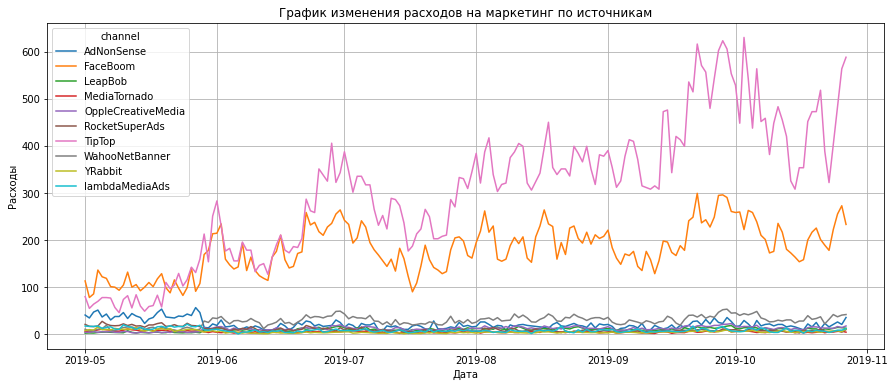

In [ ]:
costs_in_time = ad_costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )

costs_in_time.plot(
           figsize=(15, 6),
           grid=True,               
           legend=True)

plt.title('График изменения расходов на маркетинг по источникам')
plt.xlabel('Дата')
plt.ylabel('Расходы')
plt.show()

**Вывод**

Расходы на каналы привлечения Tiptop и FaceBoom растут с конца мая 2019 г., в то время как остальные каналы стоимость оставили прежней на протяжении всего периода.

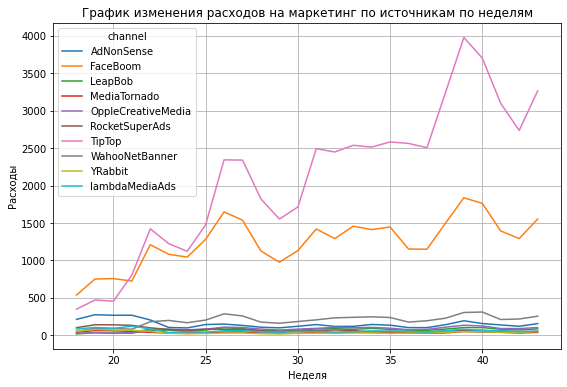

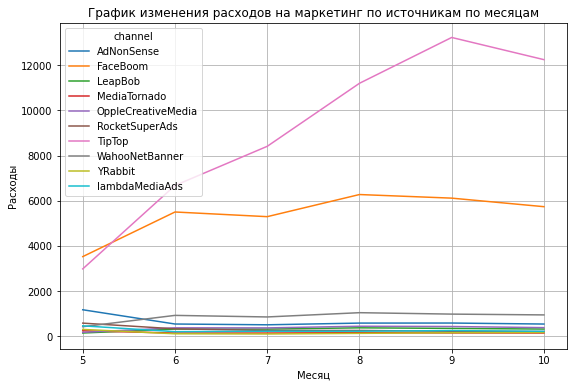

In [ ]:
#создаем столбцы week и month
ad_costs['dt'] = pd.to_datetime(ad_costs['dt'])
ad_costs['week'] = ad_costs['dt'].dt.isocalendar().week
ad_costs['month'] = ad_costs['dt'].dt.month
#строим графики динамики
costs_week = ad_costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum') 
ax1=plt.subplot(1, 2, 1)
costs_week.plot(figsize=(20, 6), grid=True, ax=ax1)
plt.title('График изменения расходов на маркетинг по источникам по неделям')
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.show()
costs_month = ad_costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum') 
ax2=plt.subplot(1, 2, 1)
costs_month.plot(figsize=(20, 6), grid=True, ax=ax2) 
plt.title('График изменения расходов на маркетинг по источникам по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.show()

**Вывод**

Смотря на недельный и месячный графики расходы на каналы привлечения Tiptop и FaceBoom растут. 
В то время как остальные каналы стоимость оставили прежней на протяжении всего периода.

- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.

In [ ]:
cac_channel = pd.DataFrame()
cac_channel['costs_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
cac_channel.sort_values(by='costs_mean', ascending=False).style.format({'costs_mean': '{:.2f}'})

,costs_mean
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


**Вывод**

Средняя цена привлечения через Tiptop составила 2,8 у.е., на FaceBoom 1,11 у.е. На остальные каналы меньше 1 у.е.

#### Промежуточные выводы: 


- Расходы на маркетинг с 1 мая по 27 октября 2019 составили 105497.3 у.е.
     среди них основные пришлись на titop и faceboom.
- Средняя цена привлечения в среднем колеблется в районе 1-1,2 у.е.
- Расходы на привлечение через каналы TipTop и FaceBoom растут.


In [ ]:
profiles = profiles.query('channel != "organic"')
profiles['acquisition_cost'].describe()

count    93569.000000
mean         1.127481
std          0.990503
min          0.124615
25%          0.257143
50%          1.080531
75%          1.128571
max          3.715385
Name: acquisition_cost, dtype: float64

#### Вывод

Среднее значение - 1.12 у.е. за привлечение пользователя, медиана составляет 1.08 долларов. Это означает, что компания привлекая через канал TopTop платит почти в три раза больше, чем через остальные каналы. 

### Оценим окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей тоже определим.

- Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.


In [ ]:
# исключаем органический трафик, так как он бесплатный
profiles = profiles.query('channel != "organic"')
# зададим момент и горизонт анализа
observation_date = datetime(2019, 11, 1).date()  # момент анализа 
horizon_days = 14  # горизонт анализа (две недели из условия)


# получите сырые данные, таблицы LTV и ROI, а также таблицы динамики LTV и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, purchases, observation_date, horizon_days)

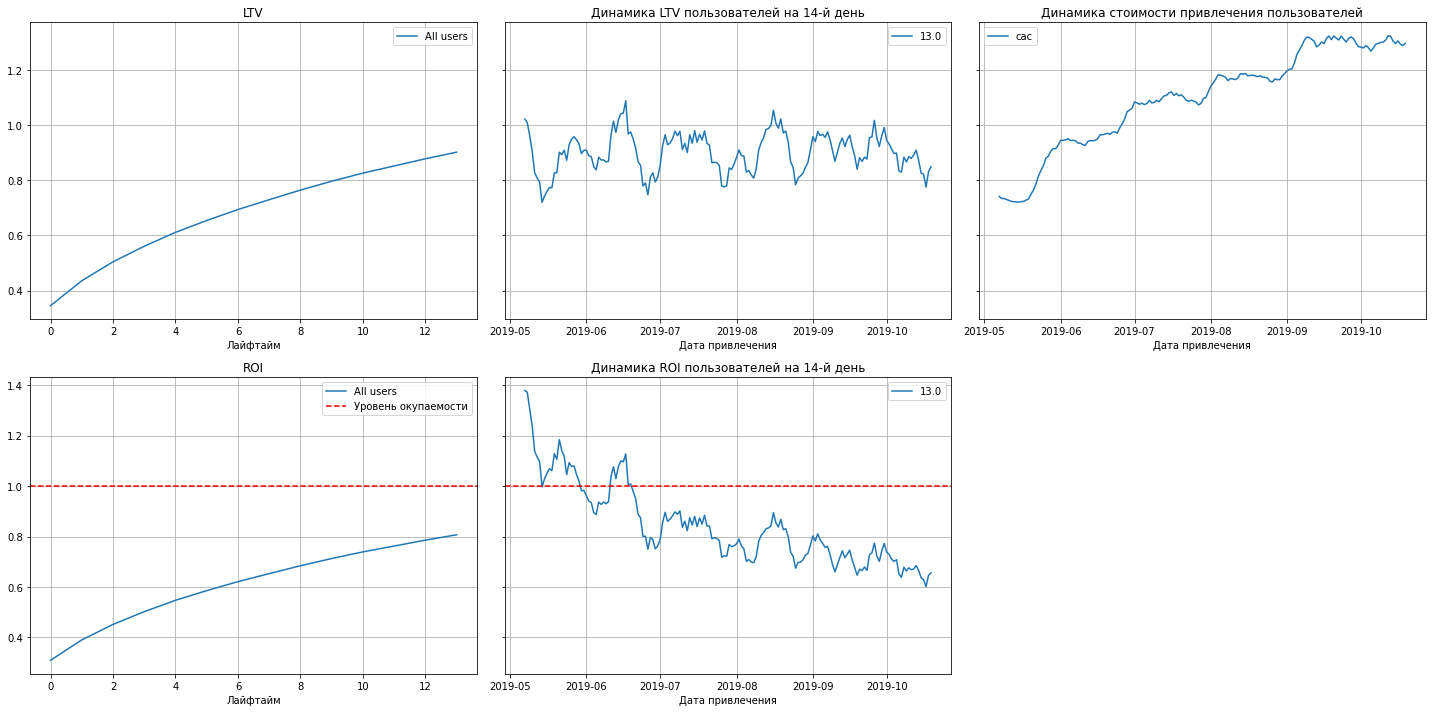

In [ ]:
# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

<b> Вывод:</b> 

- Реклама не окупается, поскольку ROI в конце второй недели — равен 80%;
- САС нестабилен, расходы на привлечение растут с течением времени;
- ROI падает после середины июня, привлечение пользователей не окупается;
- На LTV влияет сезонный фактор, но и этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

- Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

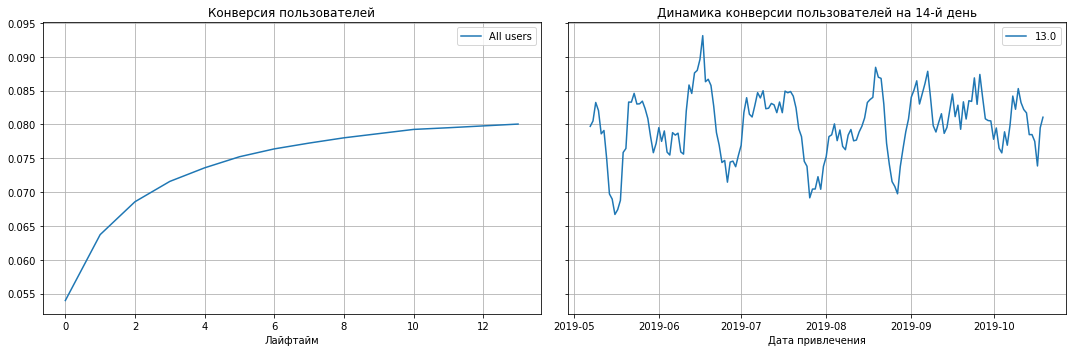

In [ ]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, purchases, observation_date, horizon_days
)
#строим графики
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

<b> Вывод:</b> 

- Судя по графикам, пользователи конвертируются хорошо, причём постоянно.

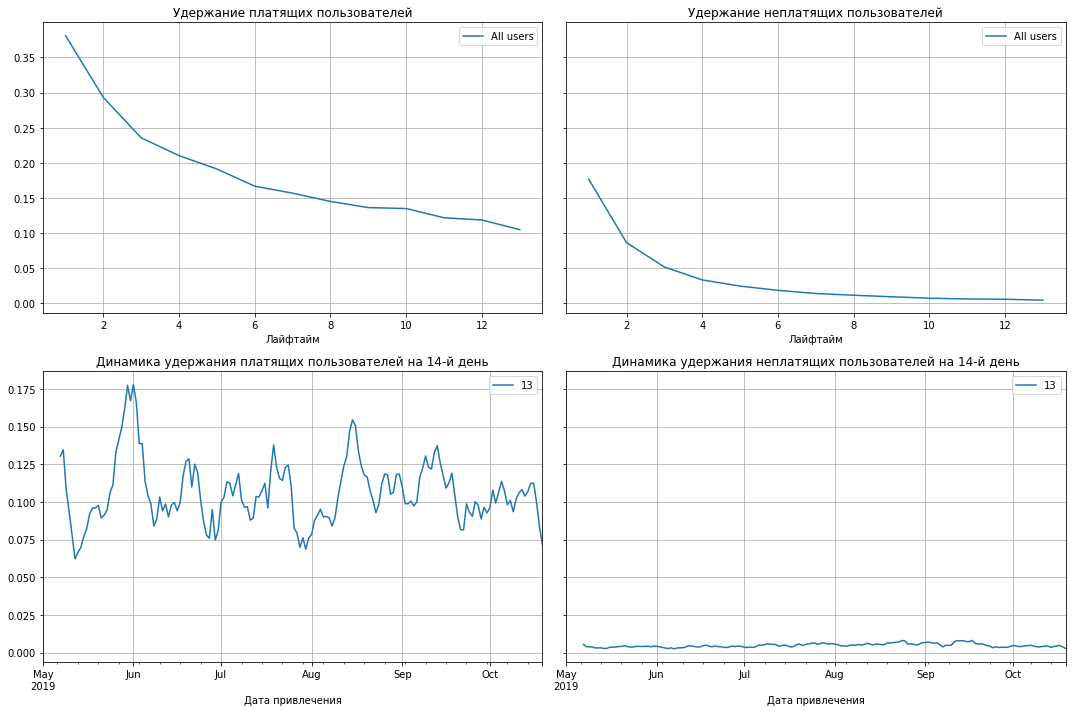

In [ ]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days)
#строим графики
plot_retention(retention_grouped, retention_history, horizon_days) 

<b> Выводы по построенным графикам:</b> 

- Судя по графикам, пользователи плохо удерживаются. 

- Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

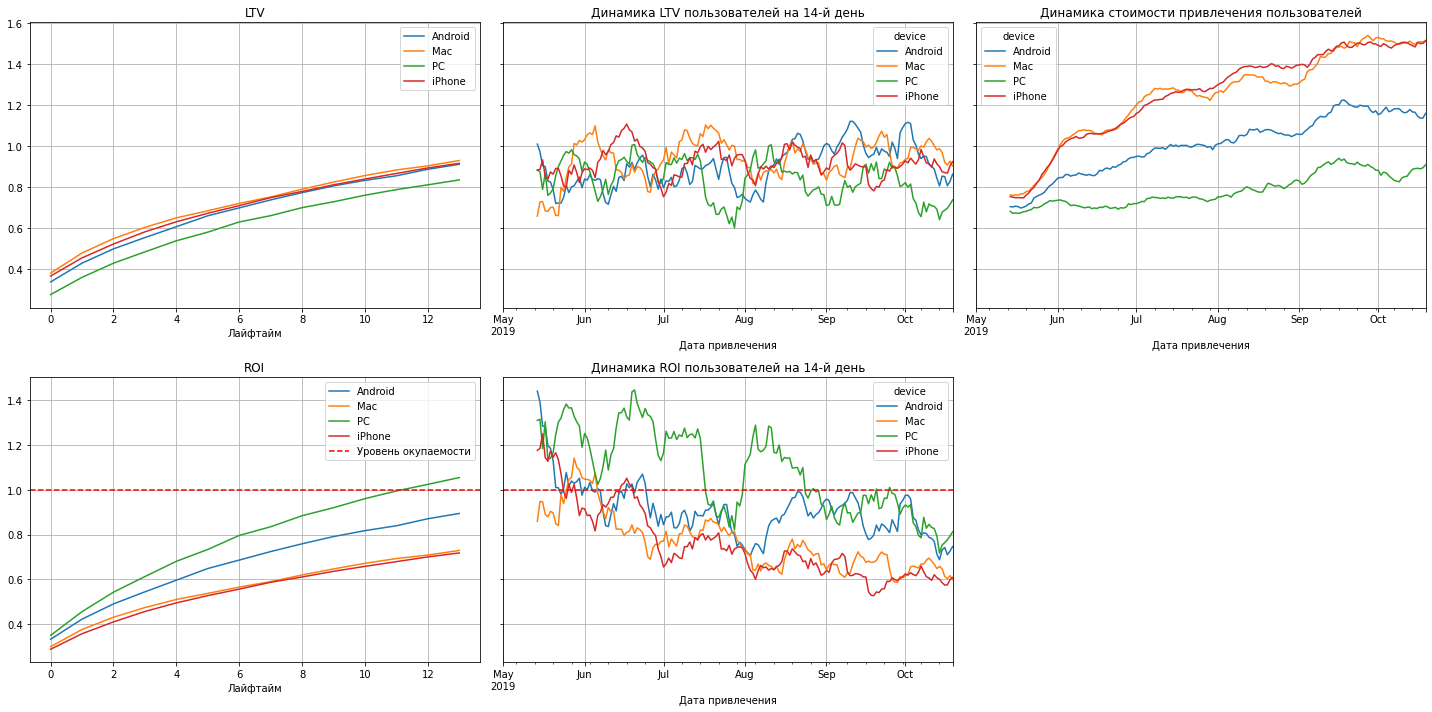

In [ ]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, purchases, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

<b> Выводы по построенным графикам:</b>

- Пользователи PC окупаются на 11 день, а остальные не окупаются к 14 дню; 

- В динамике ROI видно, что пользователи Android, iPhone окупались до середины июня, PC - до конца августа. Mac - стабильно не окупался;

- Затраты на привлечение у iPhone и Mac почти равны и выше остальных, а ROI хуже. В то время как с PC - наоборот: расходы наименьшие, а ROI лучше, чем у других.

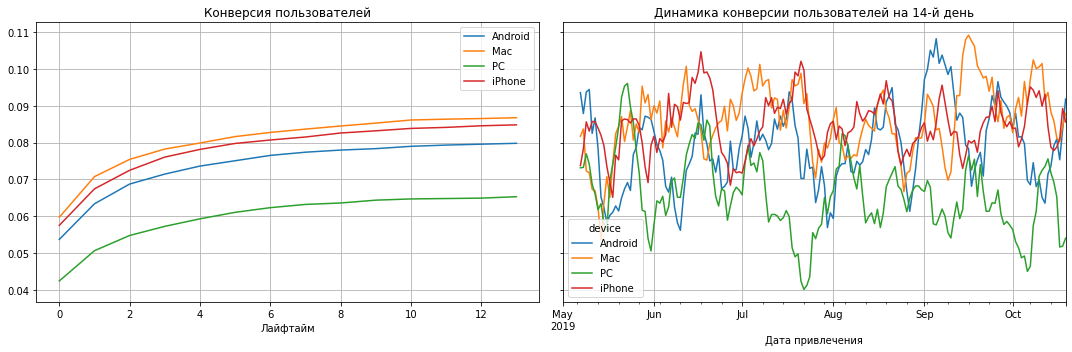

In [ ]:
dimensions = ['device']
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, purchases, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

<b> Выводы по построенным графикам:</b>
    
Судя по графикам, пользователи конвертируются хорошо, причём постоянно. 

Видимо, дело в удержании. 

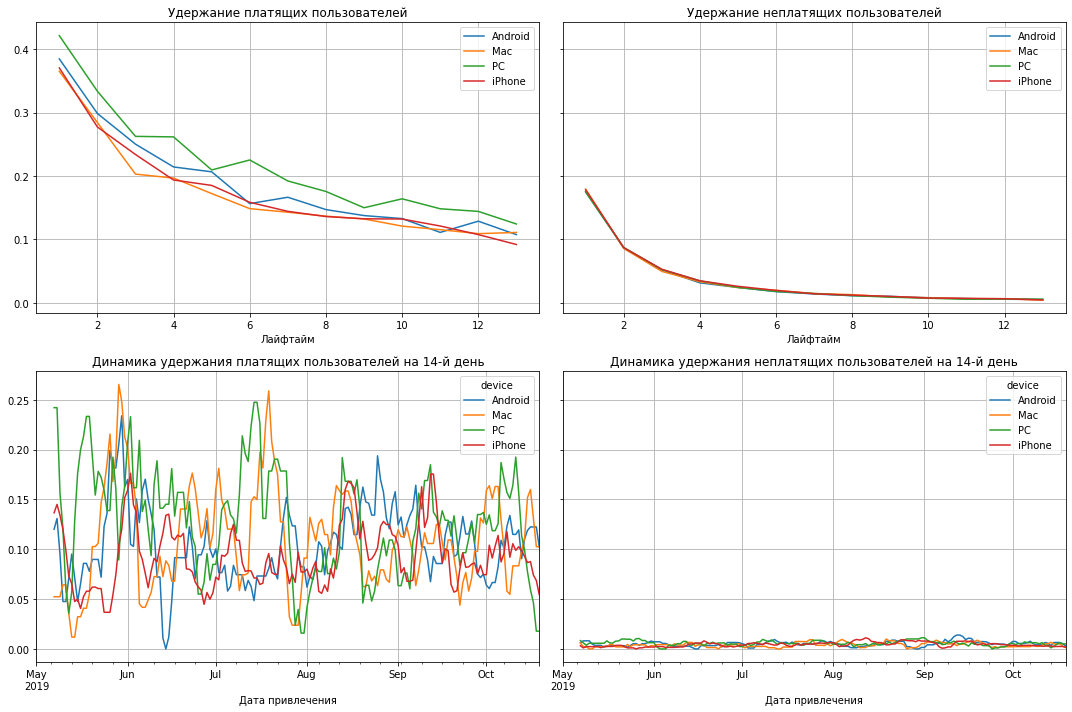

In [ ]:
dimensions = ['device']
# смотрим удержание с разбивкой по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

<b> Выводы по построенным графикам:</b>
    
Нет каких-то определенных устройств, из-за которых пользователи плохо удерживались. 

Неплатящие пользователи удерживаются стабильно плохо, а из платящих лучше всего удерживаются пользователи PC.

- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

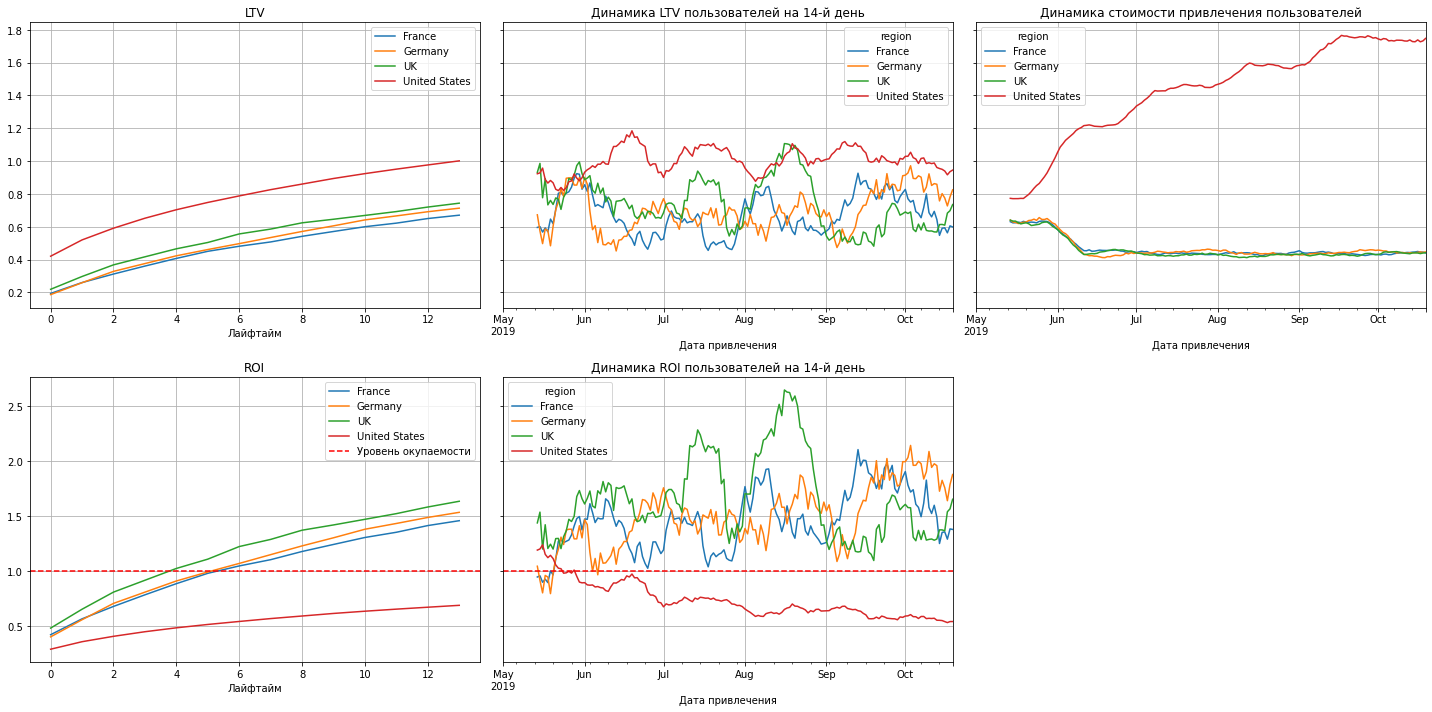

In [ ]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, purchases, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

<b> Выводы по построенным графикам:</b>
- В США реклама не окупается. Лучше всего окупается Англия и Германия.
- При этом стоимость привлечения пользователей из Америки - самая высокая. И она растет.
- LTV всё так же подвержен сезонности, но стабилен.

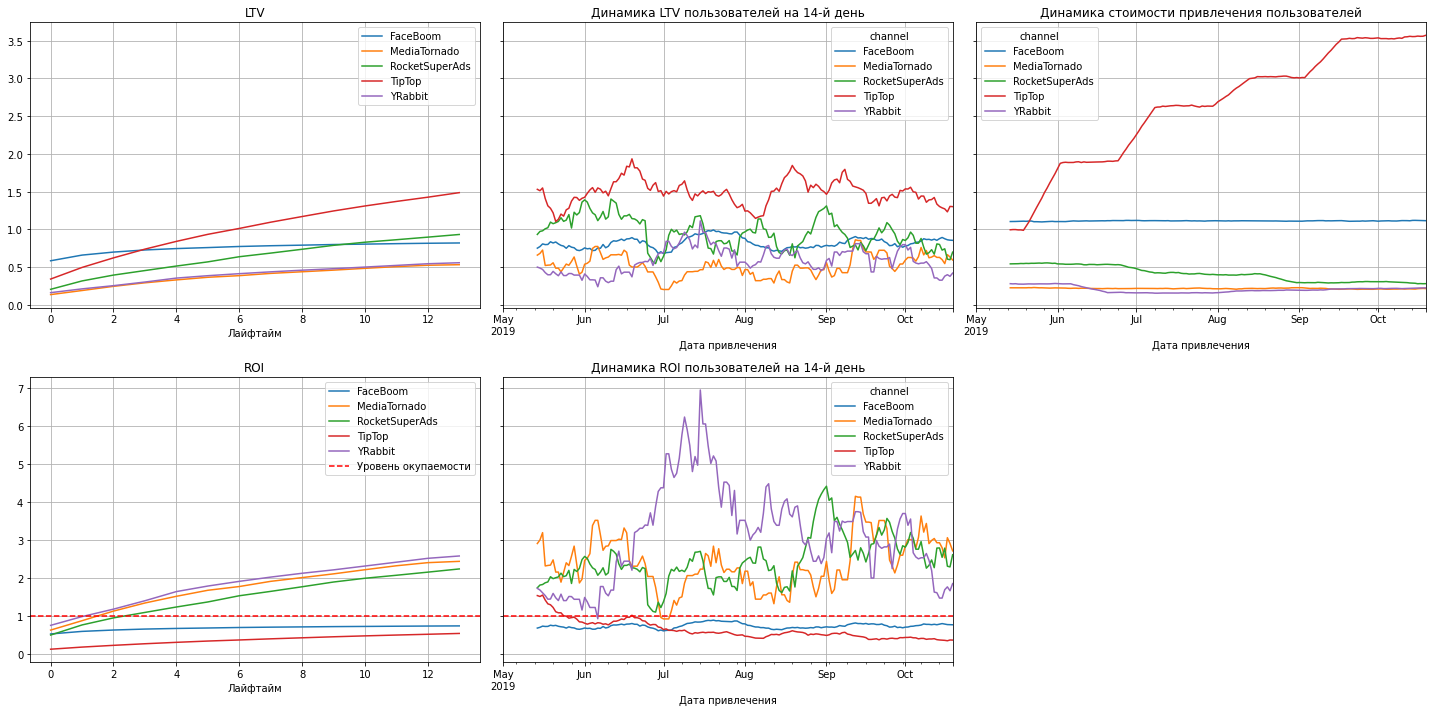

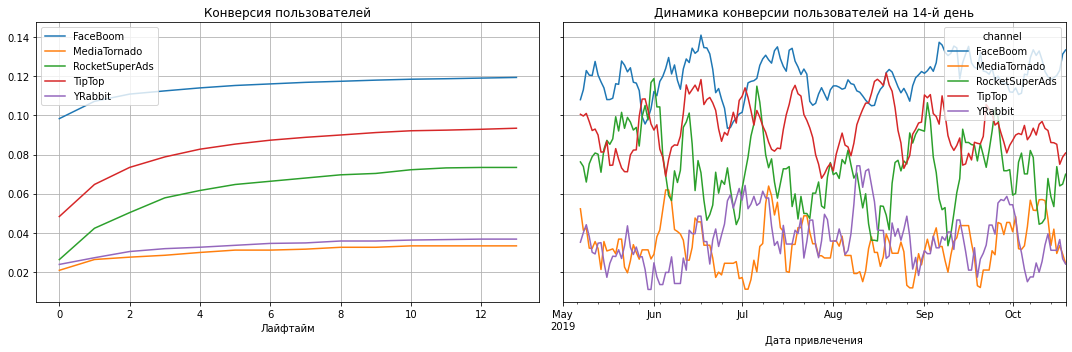

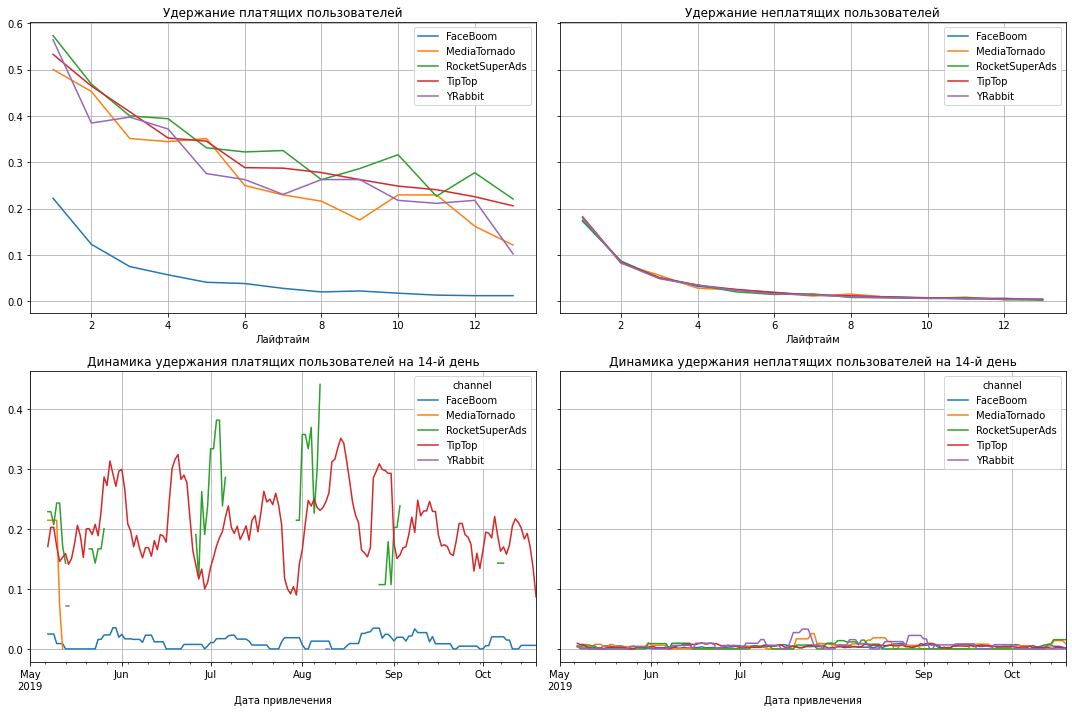

In [ ]:
profiles_US = profiles.query('region == "United States"')
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_US, purchases, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

dimensions = ['channel']
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_US, purchases, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

dimensions = ['channel']
# смотрим удержание с разбивкой по странам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_US, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

<b> Выводы по построенным графикам:</b>

- Через три канала по рынку США реклама окупится: YRabbit, TipTot, RocketSuperAds.
- При этом стоимость привлечения пользователей растет только через TipTop.
- Самая лучшая конверсия у FaceBoom, TipTot, RocketSuperAds.
- Самое плохое удержание у FaceBoom.

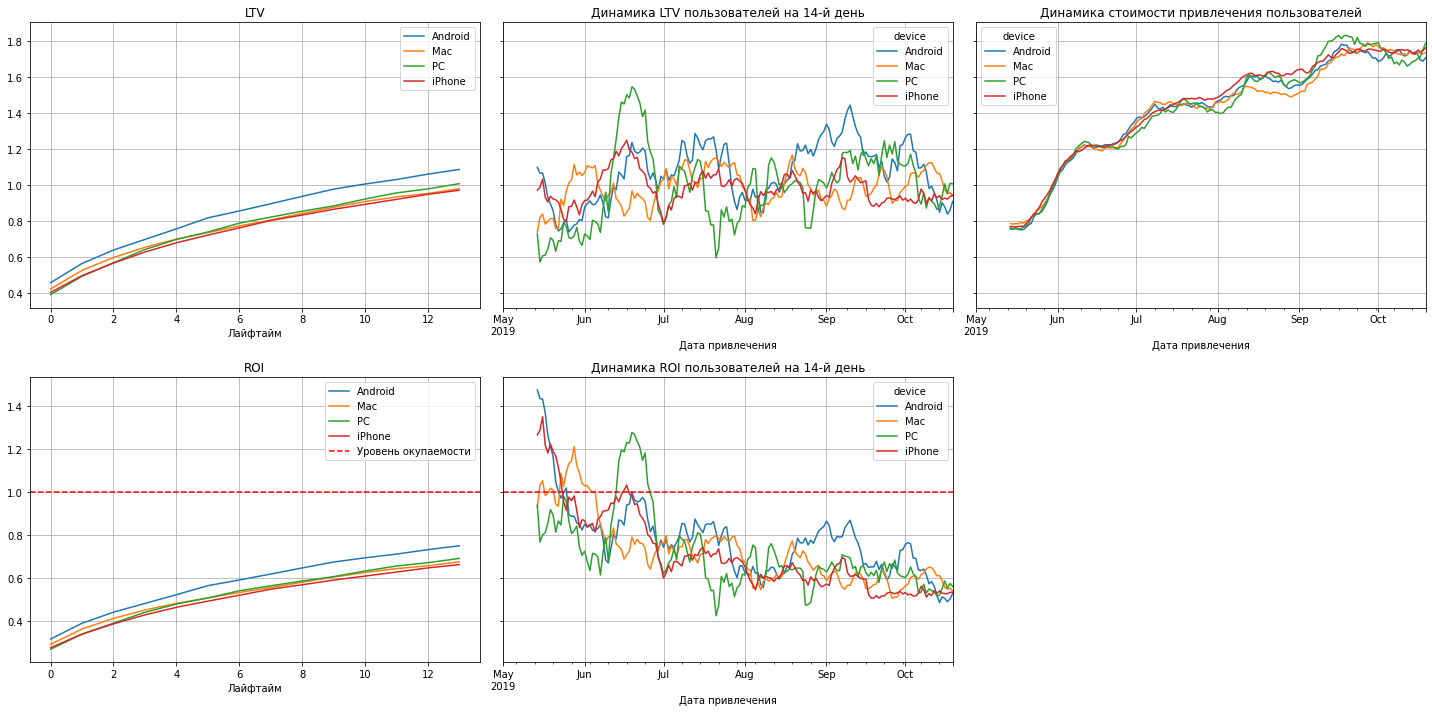

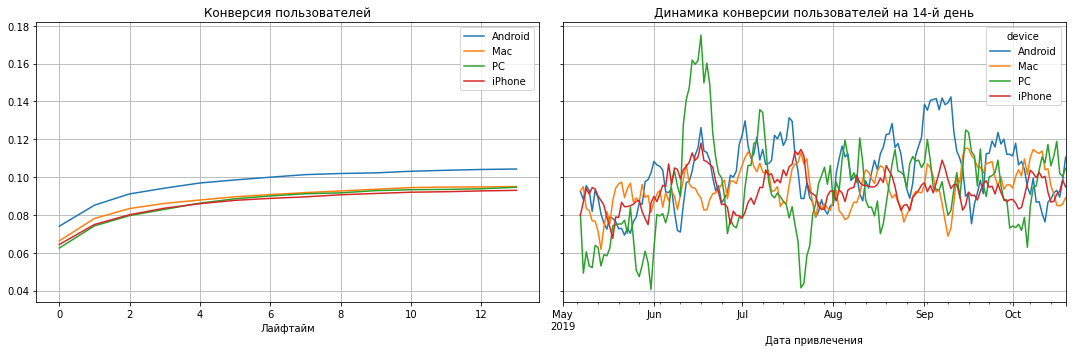

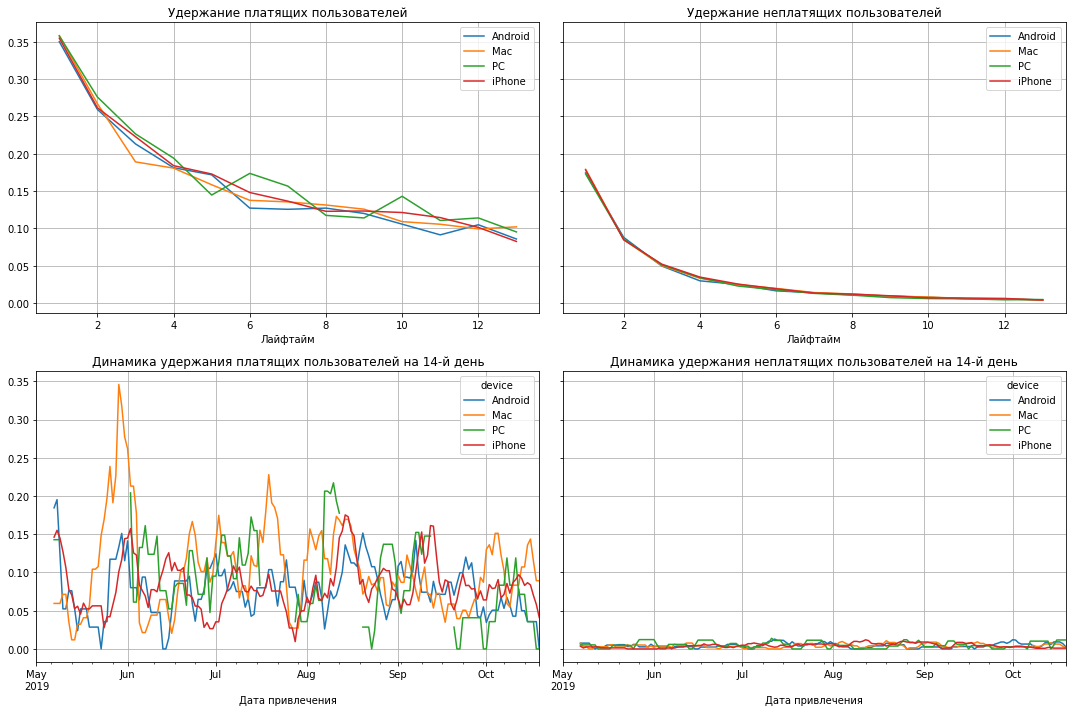

In [ ]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_US, purchases, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

dimensions = ['device']
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_US, purchases, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

dimensions = ['device']
# смотрим удержание с разбивкой по странам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_US, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

<b> Выводы по построенным графикам:</b>

- Через все устройства по рынку США реклама не окупается.
- Динамика роста стоимости привлечения у всех прблизительно одинакова.
- Остальные показатели в основном тоже плюс/минус равны.

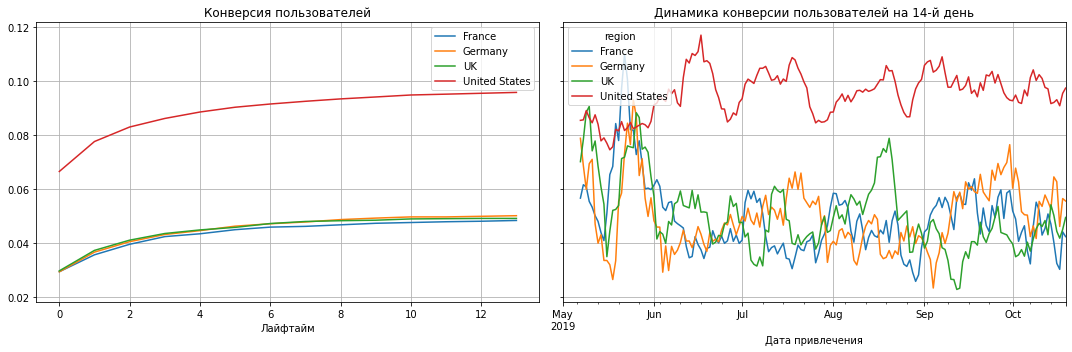

In [ ]:
dimensions = ['region']
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, purchases, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

<b> Выводы по построенным графикам:</b>
    
США - лидер в конверсии. 

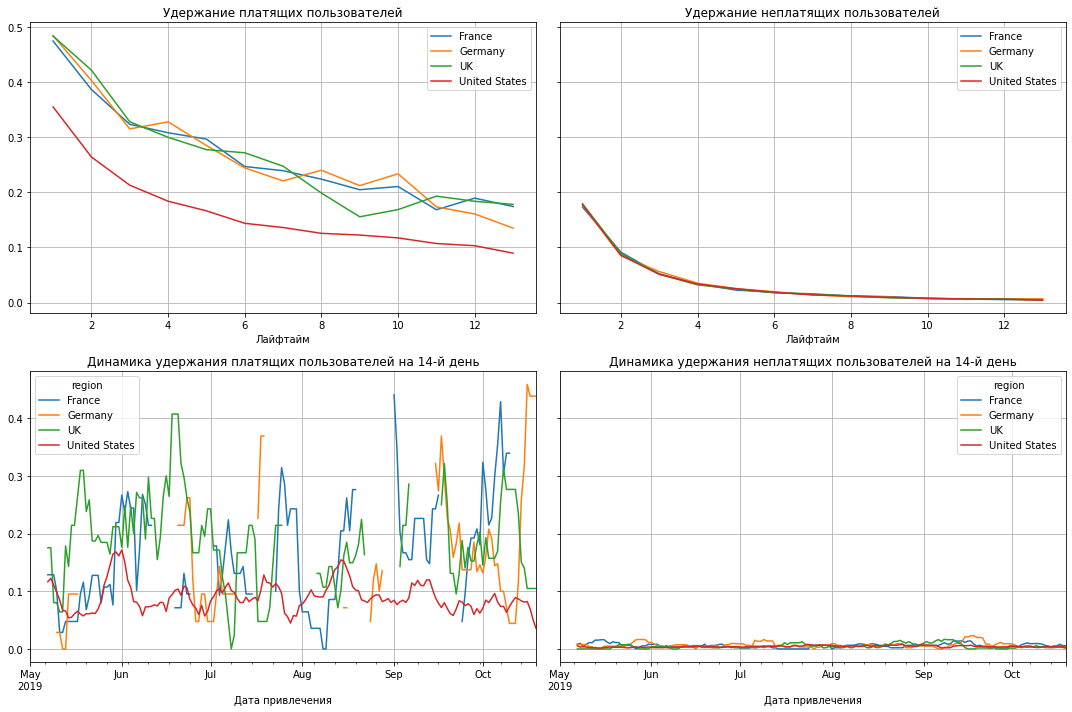

In [ ]:
dimensions = ['region']
# смотрим удержание с разбивкой по странам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

<b> Выводы по построенным графикам:</b>
    
Хуже всего удерживаются пользователи из США. 

- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

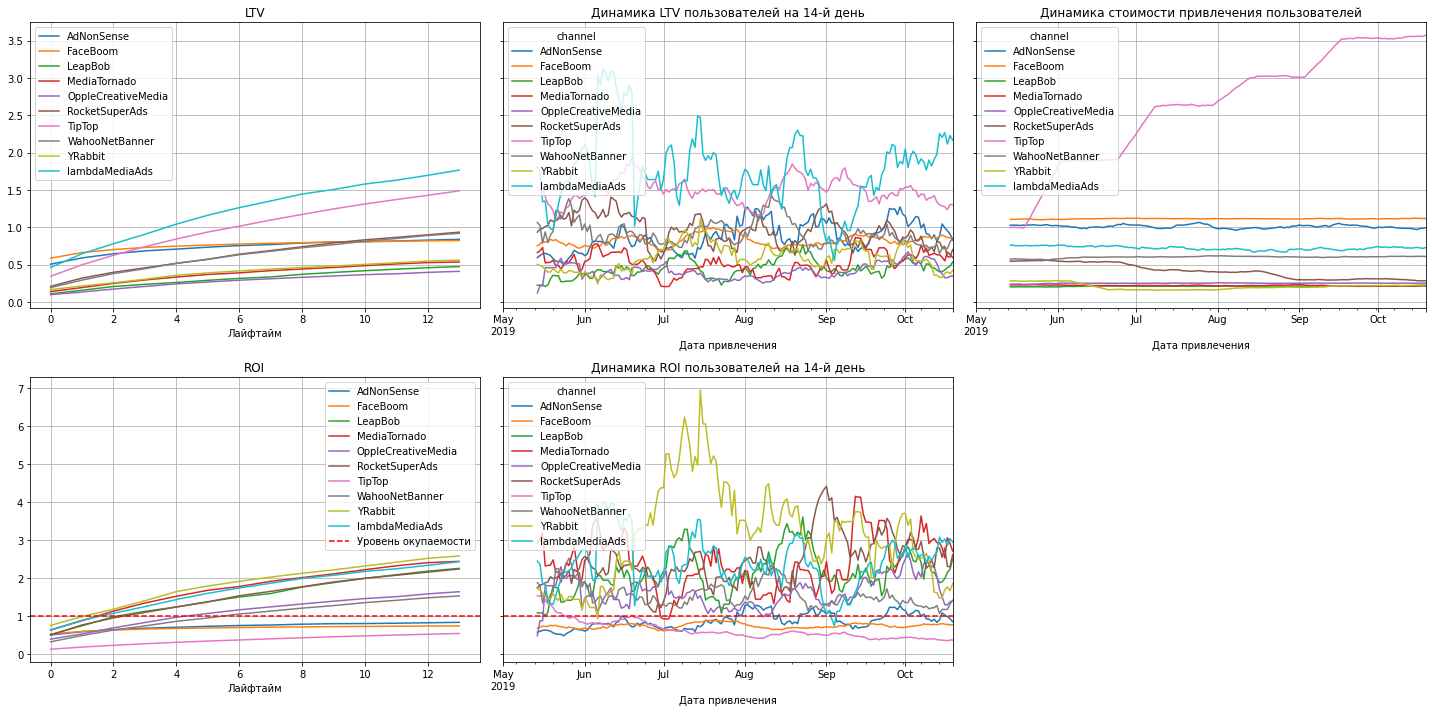

In [ ]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, purchases, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

<b> Выводы по построенным графикам:</b>
- Наблюдается рост стоимости привлечения пользователей из рекламного канала TipTop. У остальных она остается на прежнем уровне.
- Не окупаются пользователи, привлеченные из каналов AdNonSense, FaceBoom, TipTop.
- ROI Yrabbit выделился среди остальных в положительном ключе.

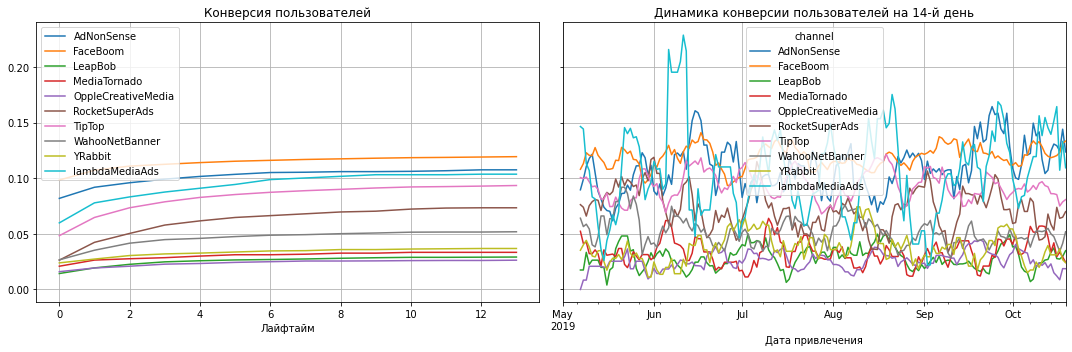

In [ ]:
dimensions = ['channel']
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, purchases, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

<b> Выводы по построенным графикам:</b>

Пользователи из OppleCreativeMedia, LeapBob, MediaTornado, YRabbit плохо конвертируются.

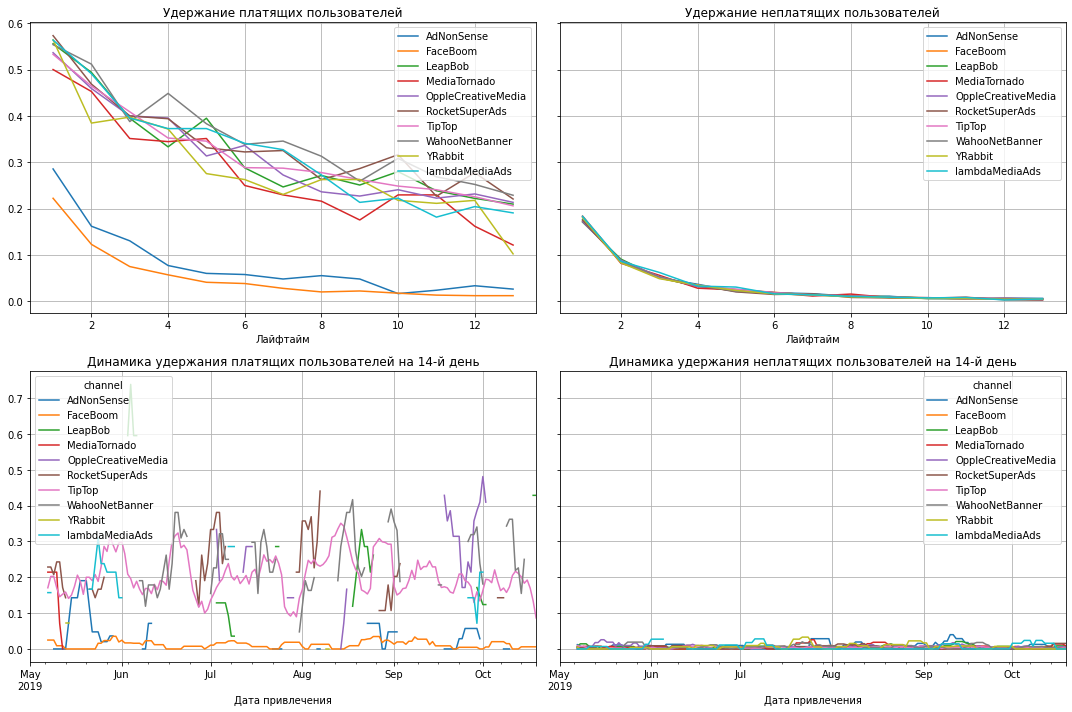

In [ ]:
dimensions = ['channel']
# смотрим удержание с разбивкой по странам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

<b> Выводы по построенным графикам:</b>

Очень плохо удерживаются пользователи из каналов FaceBoom и AdNonSense.

- Ответим на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишем вывод, опишем возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Общий вывод:
- В целом реклама не окупается;
- Если говорить об окупаемости рекламы в зависимости от:
    1. Устройств:
Окупаются только пользователи PC, а остальные нет; 
В динамике ROI видно, что пользователи Android, iPhone окупались до середины июня, PC - до конца августа. 
Mac - стабильно не окупался; Затраты на привлечение у iPhone и Mac почти равны и выше остальных, а ROI хуже. 
В то время как с PC - наоборот: расходы наименьшие, а ROI лучше, чем у других.
Можно увеличить продажи PC.
    2. Страны:
В США реклама не окупается. Лучше всего окупается Англия и Германия. 
При этом стоимость привлечения пользователей из Америки - самая высокая. И она растет.
Возможно лучше сосредоточиться на рекламе в других странах (Англия и Германия);
    3. Каналы:
Наблюдается рост стоимости привлечения пользователей из рекламного канала TipTop. 
У остальных она остается на прежнем уровне.
Не окупаются пользователи, привлеченные из каналов AdNonSense, FaceBoom, TipTop.
ROI Yrabbit выделился среди остальных в положительном ключе. 
Есть смысл переключиться на него и на других более дешевых, чем выше названные три.

### Выводы

#### Выделим причины неэффективности привлечения пользователей.

1. Реклама не окупается к 14 дню. ROI составляет - 80%.

2. Нестабильный САС, расходы на привлечение растут с течением времени;

3. На LTV влияет сезонный фактор, но в целом, этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

Чтобы разобраться в причинах, мы прошлись по всем доступным характеристикам пользователей — стране, каналу и устройству первого посещения.
1. Устройства:
    Окупаются только пользователи PC, а остальные нет; 
    В динамике ROI видно, что пользователи Android, iPhone окупались до середины июня, PC - до конца августа. 
    Mac - стабильно не окупался; Затраты на привлечение у iPhone и Mac почти равны и выше остальных, а ROI хуже. 
    В то время как с PC - наоборот: расходы наименьшие, а ROI лучше, чем у других.
    Можно увеличить продажи PC.
2. Страны:
    В США реклама не окупается. При более детальном рассмотрении есть три канала по рынку США реклама, которых окупится: YRabbit, TipTot, RocketSuperAds. При этом стоимость привлечения пользователей растет только через TipTop. Самая лучшая конверсия у FaceBoom, TipTot, RocketSuperAds. Самое плохое удержание у FaceBoom.
    Лучше всего окупается Англия и Германия. 
    При этом стоимость привлечения пользователей из Америки - самая высокая. И она растет.
    Возможно лучше сосредоточиться на рекламе в других странах (Англия и Германия);
3. Каналы:
    Наблюдается рост стоимости привлечения пользователей из рекламного канала TipTop. 
    У остальных она остается на прежнем уровне.
    Не окупаются пользователи, привлеченные из каналов AdNonSense, FaceBoom, TipTop.
    LambdaMediaAds выделился среди остальных в положительном ключе. 
    Есть смысл переключиться на него и на других более дешевых, чем выше названные три.

#### Сформулируем рекомендации для отдела маркетинга.

1. Пользователи из США имеют низкий уровень окупаемости рекламы. При этом стоимость привлечения пользователей из Америки - самая высокая. Необходимо скорректировать распределение расходов по странам. Лучше всего окупается Англия и Германия. Возможно, стоит попробовать закупить больше трафика, целясь на эти регионы. Что касается США, то тут нужно рекламу оставить у RocketSuperAds и, тем самым мы будем окупать рекламу и иметь хорошую конверсию.

2. Заострить внимание на окупаемость владельцев Mac и iPhone - стоимость их привлечения высокая, а окупаемоcть нет. Возможно, стоит переориентироваться на рекламу для PC, тем самым увеличив продажи при низкой стоимости рекламы.

3. Наблюдается рост стоимости привлечения пользователей из рекламного канала TipTop. Стоит уменьшить бюджет, выделяемый на эту сеть и перенаправить на более эффективный канал, например LambdaMediaAds, у которого хорошая конвертация и удержание платящих клиентов. Очень плохо удерживаются пользователи из каналов FaceBoom и AdNonSense. Пользователи из OppleCreativeMedia, LeapBob, MediaTornado, YRabbit плохо конвертируются.